# SportsStats

"**Client 3: SportsStats (Olympics Dataset - 120 years of data)**: SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights."


I choose this dataset because I want to work with tabular data instead of text mining in the future (maybe it's change, I don't know, but It's the focus right now). I think taht this dataset will bring me more experience about this topic.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
athdf = pd.read_csv("./athlete_events.csv")
regdf = pd.read_csv("./noc_regions.csv")

In [200]:
athdf.head(0)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI


### Questions

- What is the country that has more medals? 
    - 1º: USA;
    - 2º: Soviet Union;
    - 3º: Germany.

In [190]:
athdf[['NOC', 'Medal']].groupby('NOC').count().sort_values(by='Medal', ascending=False).head(10)

,Medal
NOC,
USA,5637
URS,2503
GER,2165
GBR,2068
FRA,1777
ITA,1637
SWE,1536
CAN,1352
AUS,1320


- Which the sex have more amount of medals?
    - Male.

In [50]:
athdf[['Sex', 'Medal']].groupby(['Sex']).count().sort_values(by='Medal', ascending=False)

,Medal
Sex,
M,28530
F,11253


**Additional Question:** Male Athletes have much more medals than Female Athletes. Here I thought: It's because of some kind of late participation in sports? And Yeah. In the first years, female athletes even haven't a single medal, and over the years, the number started to rise.

In [54]:
athdf[['Year','Sex', 'Medal']].groupby(['Year','Sex']).count().sort_values(by=['Year', 'Sex'], ascending=[True, False])

Medal
Year Sex       
1896 M      143
1900 M      591
     F       13
1904 M      476
     F       10
...         ...
2012 F      918
2014 M      332
     F      265
2016 M     1054
     F      969

[69 rows x 1 columns]

The firsts years didn't have many female athletes:

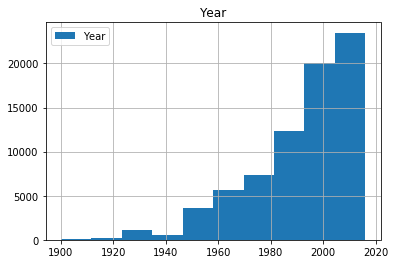

In [149]:
_ = athdf[['Year','Sex']][athdf['Sex'] == 'F'].hist(legend="")

The number of male athletes always was larger:

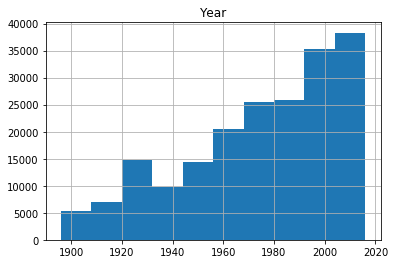

In [148]:
_ = athdf[['Year','Sex']][athdf['Sex'] == 'M'].hist()

- A higher or a lower BMI interferes in amount of medals?

![](https://prod.static9.net.au/_/media/Network/Images/2018/04/04/13/08/180404_coach_bmi.jpg)

In [178]:
def bmi_score(x):
    if x < 18.5:
        return 'Underweight'
    elif x < 24.9:
        return 'Normal'
    elif x < 29.9:
        return 'Overweight'
    elif x < 34.9:
        return 'Obese'
    else:
        return 'Extremly Obese'

The result shows that Athletes with normal BMI have more metals than others BMI athletes.

In [183]:
athdf['BMI'] = ((athdf['Weight']) / (athdf['Height']*2))*100

athdf['BMI'] = athdf['BMI'].apply(lambda x: bmi_score(x))

athdf[['BMI', 'Medal']].groupby('BMI').count().sort_values(by=['Medal'], ascending=False).head(10)

,Medal
BMI,
Normal,19904
Extremly Obese,9674
Underweight,7823
Overweight,2114
Obese,268


### Hypothesis

- Older athletes have more medals than younger ones.

**Wrong.** Here we could see that younger athletes have more medals than older athletes. Maybe because of the proportion of age, maybe because of the physical preparations. We will discoverer it at the next milestone.

In [185]:
athdf[['Age', 'Medal']].groupby(['Age']).count().sort_values(by=['Medal'], ascending=False)

,Medal
Age,
23.0,3395
24.0,3289
22.0,3159
25.0,3124
26.0,2924
...,...
81.0,0
84.0,0
88.0,0


- Countries with more athletes have more medals.

**Maybe**.  The proportion of Athletes/Medal looks like it works. We need to explore more about the Soviet Union. Maybe it's an outlier?

In [201]:
athdf[['Team','ID','Medal']].groupby(['Team']).count().sort_values(by=['ID'], ascending=False).head(15)

,ID,Medal
Team,,
United States,17847,5219
France,11988,1550
Great Britain,11404,1673
Italy,10260,1527
Germany,9326,1984
Canada,9279,1243
Japan,8289,911
Sweden,8052,1434
Australia,7513,1306
